# **Supervised Machine Learning**

Marina Márquez Macías<br>

10 de enero de 2024

Vamos a aplicar aprendizaje automático supervisado mediante el uso de redes neuronales sobre una base de datos. Cargamos las librerías que nos serán útiles para realizar esta tarea.

In [ ]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import stats
import numpy as np

Para poder usar las redes multicapas hacia adelante, importaremos el módulo `MLPClassifier`, el cual está dentro del módulo `neural_network`en `scikit_learn`.

In [ ]:
from sklearn.neural_network import MLPClassifier

Vamos a trabajar con la base de datos *Digits* del paquete `scikit-learn`. Es un conjunto de datos que contiene `1797` imágenes de dígitos escritos a mano, del 0 al 9. Cada imagen es de 8x8 píxeles, y cada píxel tiene un valor entre 0 y 16, que representa la intensidad del color en escala de grises. Por lo tanto, cada imagen es representada como un vector de `64` características (8x8).

El objetivo principal de este cuestionario es clasificar las imágenes de dígitos en las categorías correspondientes, es decir, predecir a qué dígito pertenece cada imagen.

In [ ]:
digits=load_digits()

Para empezar, podemos visualizar los datos con los que vamos a trabajar *(X_digits)* , y sus valores de clasificación *(y_digits)*.

In [ ]:
X_digits=digits.data
y_digits=digits.target
print('Tamaño matriz de datos:', X_digits.shape)
print('Tamaño matriz de etiquetas:', y_digits.shape)

Tamaño matriz de datos: (1797, 64)
Tamaño matriz de etiquetas: (1797,)


In [ ]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Podemos observar los valores de intensidad de los píxeles en la primera imagen.

In [ ]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

También observamos los valores de intensidad del píxel 1 en todas las imágenes.

In [ ]:
X_digits[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

Se puede notar que el píxel 1 tiene un valor de intensidad 0 en la escala de grises en todas las imágenes.

In [ ]:
set(X_digits[:,0].tolist())

{0.0}

Veamos también las etiquetas de clasificación de cada imagen.

In [ ]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

Los posibles valores de clasificación son 10, los dígitos del 0 al 9.

In [ ]:
set(y_digits.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Vamos a crear ahora dos matrices (maxs,mins) que almacenan los valores máximos y mínimos de cada píxel, respectivamente.

In [ ]:
maxs,mins = np.max(X_digits, axis=0),np.min(X_digits,axis=0)

In [ ]:
maxs

array([ 0.,  8., 16., 16., 16., 16., 16., 15.,  2., 16., 16., 16., 16.,
       16., 16., 12.,  2., 16., 16., 16., 16., 16., 16.,  8.,  1., 15.,
       16., 16., 16., 16., 15.,  1.,  0., 14., 16., 16., 16., 16., 14.,
        0.,  4., 16., 16., 16., 16., 16., 16.,  6.,  8., 16., 16., 16.,
       16., 16., 16., 13.,  1.,  9., 16., 16., 16., 16., 16., 16.])

En la matriz `maxs`, podemos observar que los píxeles 1, 33 y 40 tienen un valor de intensidad nulo en todas las imágenes.

In [ ]:
mins

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Podemos observar que la matriz `mins` es nula. Esto tiene sentido ya que, dado un píxel cualquiera, seguramente en una de las 1797 imágenes, su intensidad de color en la escala de grises sea 0. Por lo tanto, el mínimo valor de ese píxel será nulo. Y esto lo podemos aplicar a todos los píxeles. No es necesario que haya un píxel con un valor mayor que cero de intensidad en todas y cada una de las imágenes.

Vamos a representar ahora como varían los datos de estas matrices.

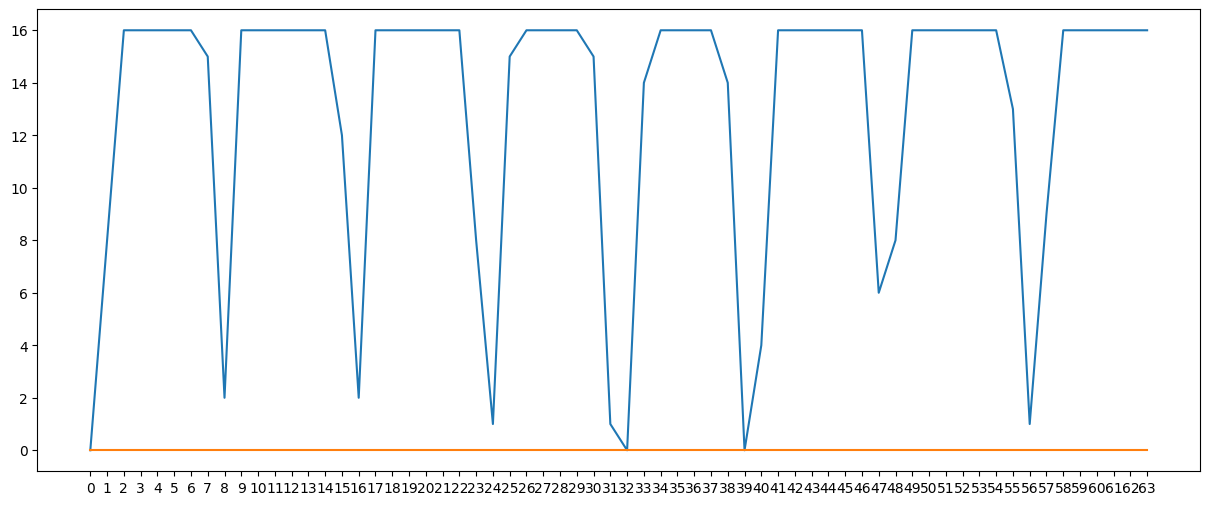

In [ ]:
ext_inf = 0
ext_sup = 64  # Los píxeles se numeran del 0 al 63.
plt.figure(figsize=(15,6))
plt.plot(maxs[ext_inf:ext_sup])
plt.plot(mins[ext_inf:ext_sup])
plt.xticks(ticks= range(ext_sup - ext_inf), labels = range(ext_inf,ext_sup))
plt.show()

Podemos observar que se repite un patrón en esta gráfica. Esto tiene sentido debido a que los píxeles múltiplos de 8 o los cercanos a los mismos, representan a los píxeles que están en los laterales de la imagen, los cuales por lo general no están tan cubiertos como los píxeles más céntricos, por eso la intensidad de ellos en la escala de grises es más baja, y por lo tanto, en la gráfica se notan picos hacia abajo en los píxeles múltiplos de 8 y los píxeles de sus entornos.

El siguiente gráfico muestra los valores máximos de la intensidad de cada píxel por colores. Observamos que los píxeles de los laterales tienen un valor de intensidad en la escala de grises mucho menor que los píxeles más céntricos.

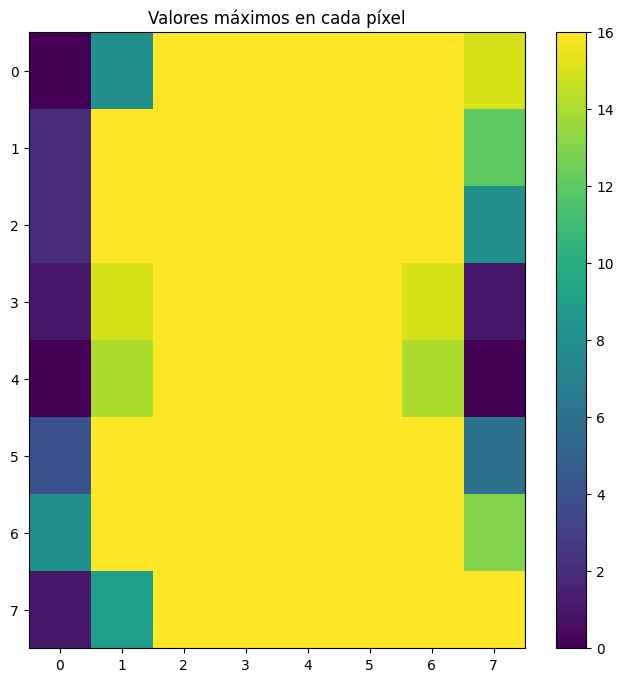

In [ ]:
maxs_matrix = maxs.reshape(8, 8)

plt.figure(figsize=(8, 8))
plt.imshow(maxs_matrix, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Valores máximos en cada píxel')
plt.show()

Podemos normalizar nuestros datos usando el módulo `preprocessing` de `scikit-learn`.

In [ ]:
from sklearn import preprocessing

In [ ]:
X_digitsnorm=preprocessing.normalize(digits.data)
X_digitsnorm[0]

array([0.        , 0.        , 0.09024036, 0.23462493, 0.16243265,
       0.01804807, 0.        , 0.        , 0.        , 0.        ,
       0.23462493, 0.27072108, 0.18048072, 0.27072108, 0.09024036,
       0.        , 0.        , 0.05414422, 0.27072108, 0.03609614,
       0.        , 0.19852879, 0.14438458, 0.        , 0.        ,
       0.07219229, 0.21657686, 0.        , 0.        , 0.14438458,
       0.14438458, 0.        , 0.        , 0.09024036, 0.14438458,
       0.        , 0.        , 0.16243265, 0.14438458, 0.        ,
       0.        , 0.07219229, 0.19852879, 0.        , 0.01804807,
       0.21657686, 0.1263365 , 0.        , 0.        , 0.03609614,
       0.25267301, 0.09024036, 0.18048072, 0.21657686, 0.        ,
       0.        , 0.        , 0.        , 0.10828843, 0.23462493,
       0.18048072, 0.        , 0.        , 0.        ])

Comprobamos que los datos se han normalizado correctamente, podemos dar valores a cada imagen, y comprobar que la suma de toda la fila es 1.

In [ ]:
imagen=476
sum(X_digitsnorm[imagen][j]**2 for j in range(64))

1.0

Vamos a representar ahora como varían los valores de intensidad de cada píxel en todas las imágenes.

In [ ]:
X_digits.shape[1]

64

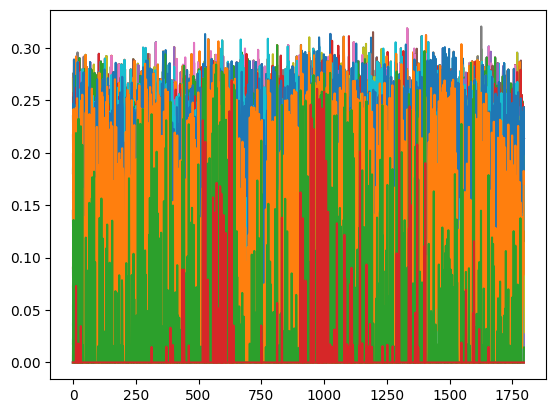

In [ ]:
for i in range(64):
    plt.plot(X_digitsnorm[:,i])
plt.show()

Como hemos notado antes, los píxeles 1, 33 y 40 tienen un valor nulo en todas las imágenes, podemos corroborarlo con la representación gráfica.

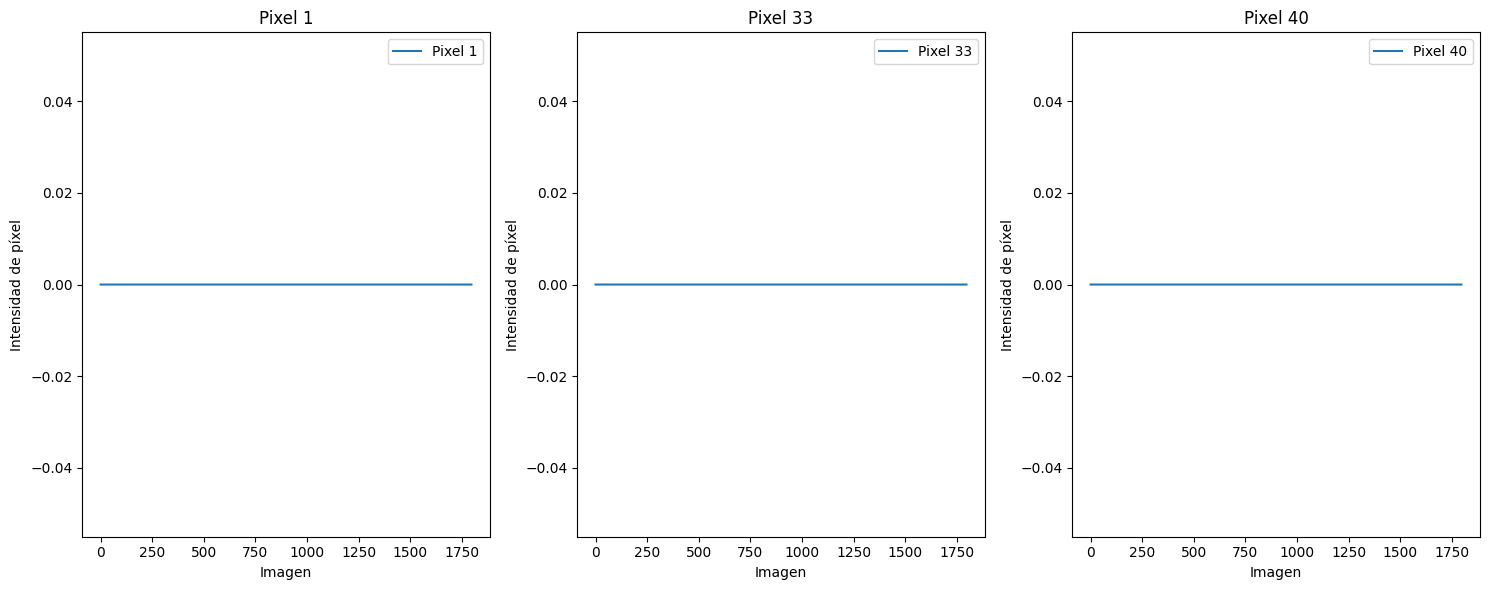

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].plot(X_digitsnorm[:, 0], label='Pixel 1')
axes[1].plot(X_digitsnorm[:, 32], label='Pixel 33')
axes[2].plot(X_digitsnorm[:, 39], label='Pixel 40')

axes[0].set_title('Pixel 1')
axes[1].set_title('Pixel 33')
axes[2].set_title('Pixel 40')

for ax in axes:
    ax.legend()
    ax.set_xlabel('Imagen')
    ax.set_ylabel('Intensidad de píxel')

plt.tight_layout()
plt.show()

También podemos representar los valores de cada píxel para una imagen concreta, por ejemplo para la primera imagen, como vemos a continuación.

Los píxeles con mayor valor en la imagen 1 son: [11 13 18]


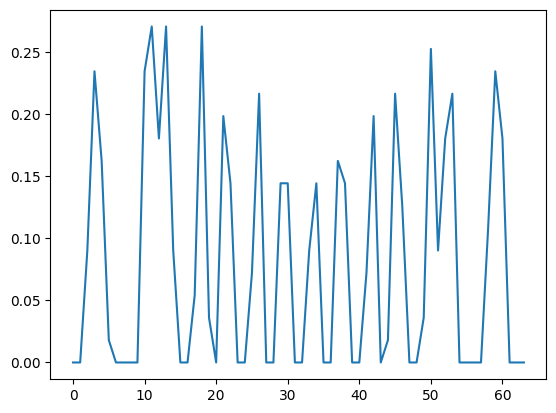

In [ ]:
plt.plot(X_digitsnorm[0,:])
pixel_max = np.where(X_digitsnorm[0,:] == np.max(X_digitsnorm[0,:]))[0]
print('Los píxeles con mayor valor en la imagen 1 son:', pixel_max)
plt.show()

Lo representamos para todas las imágenes.

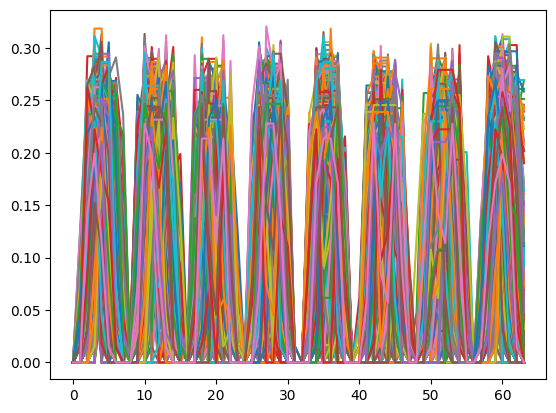

In [ ]:
for i in range(1797):
    plt.plot(X_digitsnorm[i,:])
plt.show()

Vamos a utilizar ahora TSNE para visualizar los datos en 3 dimensiones.

In [ ]:
tsne_3d = TSNE(n_components=3, random_state=5, perplexity=25.0,init='random',learning_rate='auto')
X_3d = tsne_3d.fit_transform(X_digitsnorm)

Los posibles valores de clasificación son: [0 1 2 3 4 5 6 7 8 9]


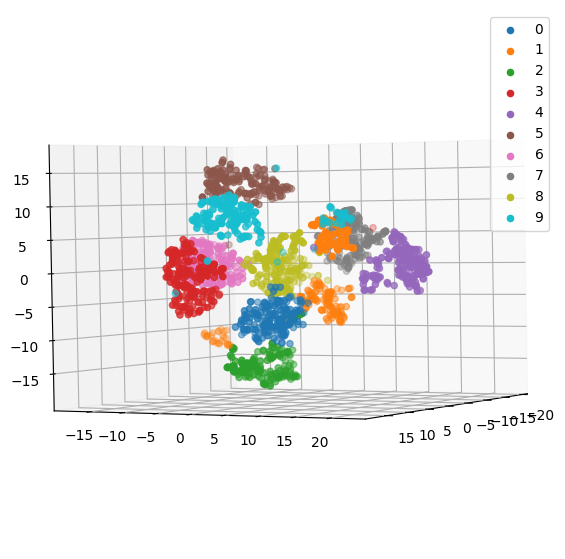

In [ ]:
target_ids = range(len(digits.target_names))
print('Los posibles valores de clasificación son:' , digits.target_names)
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for i, label in zip(target_ids, digits.target_names):
    ax.scatter(X_3d[digits.target == i, 0],
               X_3d[digits.target == i, 1],
               X_3d[digits.target == i, 2],label=label)

ax.azim = 30
ax.roll = 1
ax.elev = 1.5

plt.legend()
plt.show()

Podemos notar la presencia de outliers en esta gráfica, sobretodo para las imágenes clasificadas como el dígito `9`. Pero también podemos observar que las clasificaciones para el dígito `1` están dispersas en el plano, y se pueden diferenciar dos grupos o clústeres para esta etiqueta de clasificación.

Podemos observar también la `scatter-matrix`, pero en este caso es bastante poco eficiente y muy compleja. No nos proporciona información a priori sobre outliers.

In [ ]:
bc_dataframe = pd.DataFrame(X_digitsnorm, columns=digits.feature_names)

In [ ]:
sp = pd.plotting.scatter_matrix(bc_dataframe, c=digits.target, figsize=(25, 25), marker='o',
                                 hist_kwds={'bins': 5}, s=60, alpha=.8)

Vamos a realiza ahora boxplots, que nos van a indicar la presencia de outliers en cada píxel. En el siguiente gráfico, los puntos individuales fuera de los bigotes representan valores anómalos, es decir, outliers.

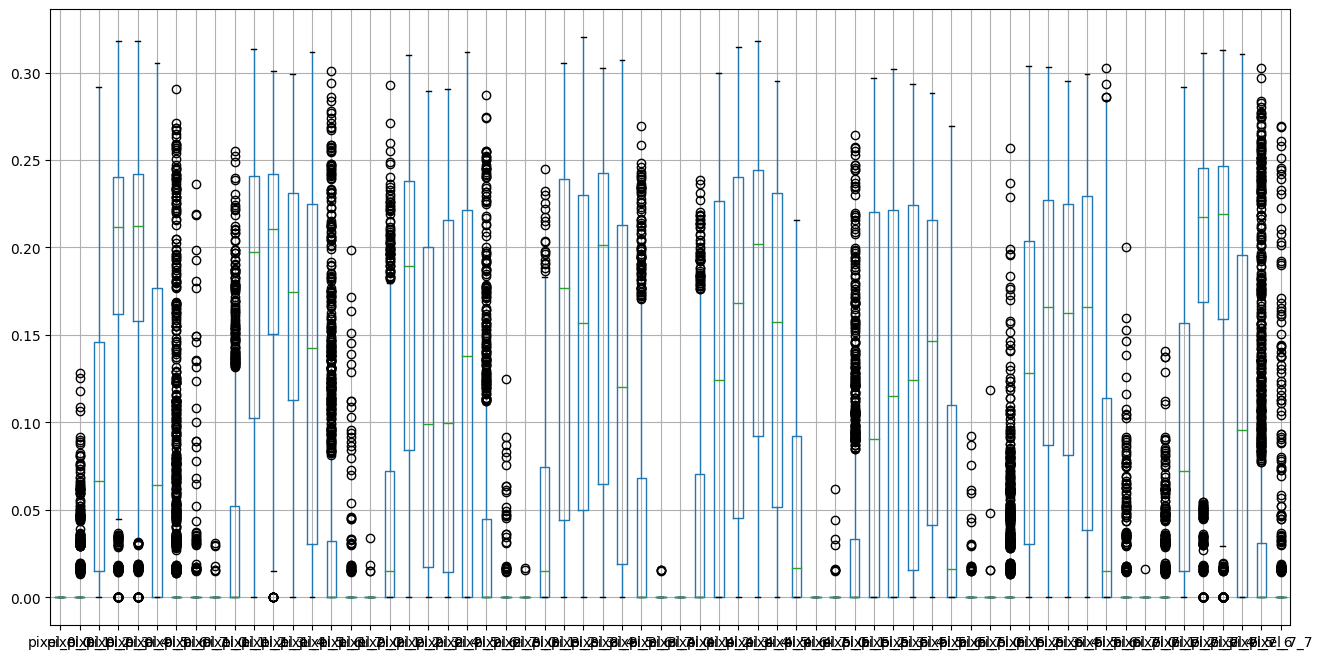

In [ ]:
mpl.rcParams['figure.figsize'] = (16,8)
bc_dataframe.boxplot();

Podemos observarlos por grupos. Por ejemplo, en el píxel 2 y en el 63 encontramos outliers.

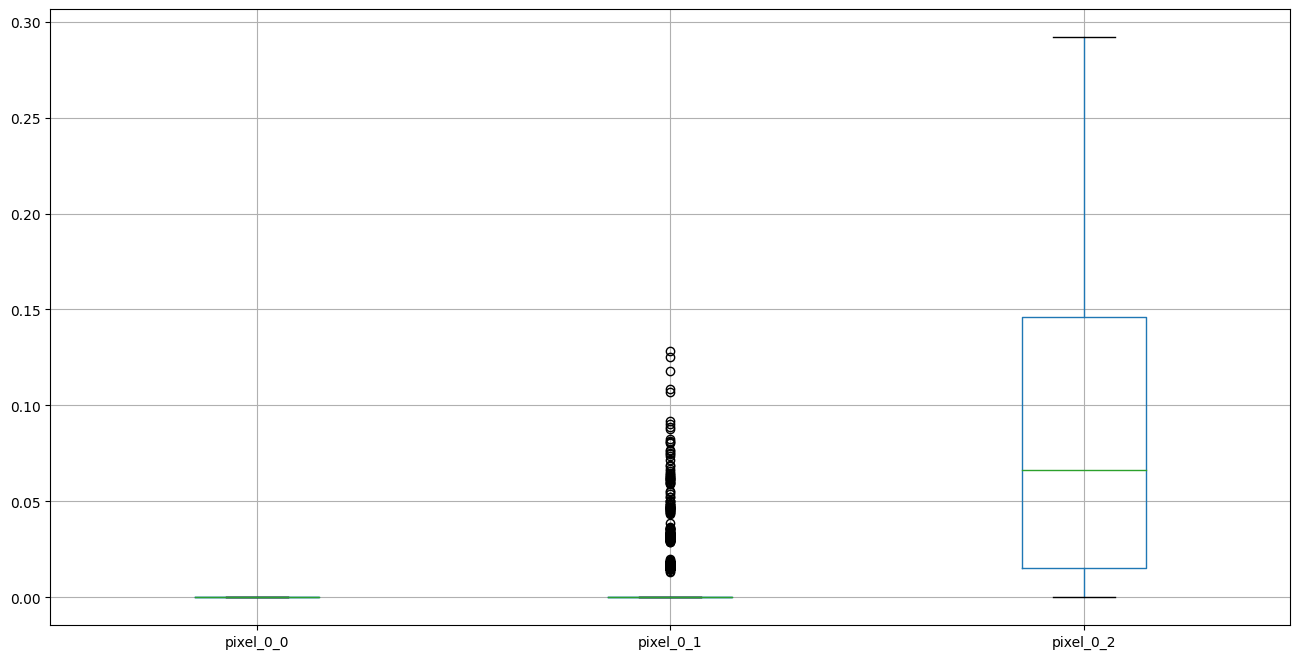

In [ ]:
bc_dataframe.iloc[:,0:3].boxplot();

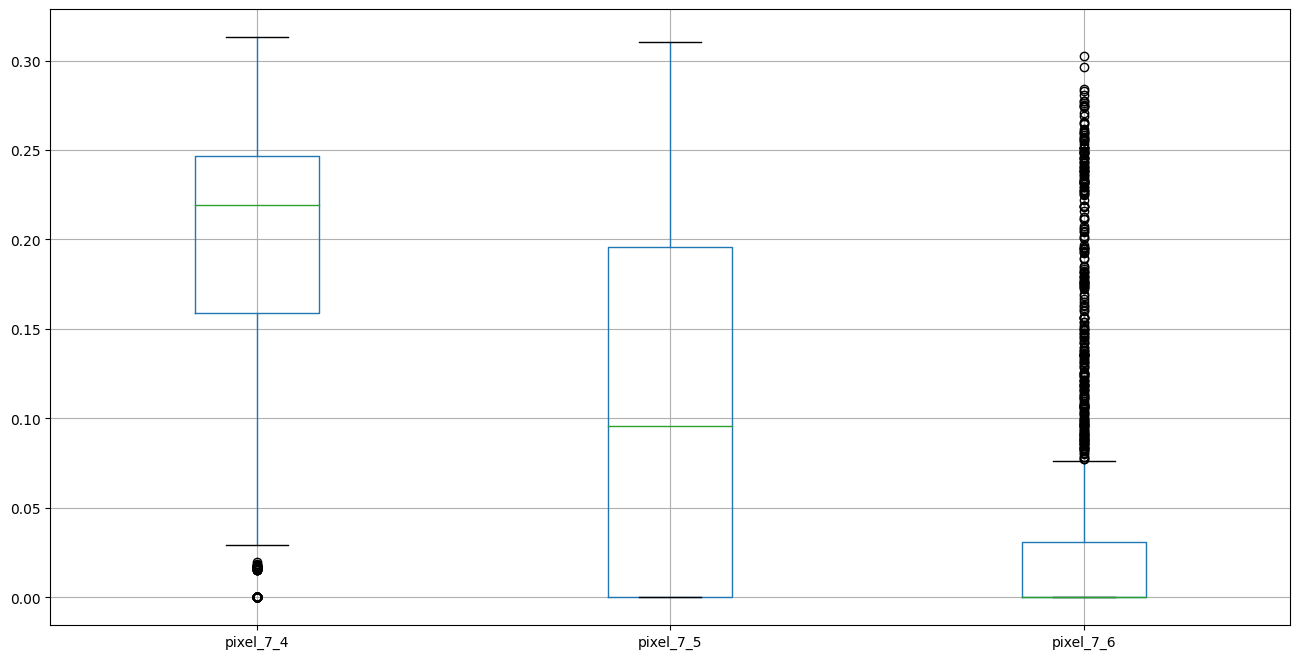

In [ ]:
bc_dataframe.iloc[:,60:63].boxplot();

Vamos ahora a intentar eliminar estos valores anómalos (outliers). Para ello, debemos tener cuidado para no eliminar más valores de la cuenta. Vamos a calcular los valores z-score de nuestra base de datos. Estos valores van a medir cuánto de anómalo es cada valor, y fijaremos un umbral tal que si el z-score de un dato supera dicho umbral, ese dato será eliminado.

Intuitivamente, el *z-score* de un valor nos marca cómo de lejos está ese valor de la media de los datos de ese atributo. Si está desproporcionadamente lejos, podemos pensar que no corresponde a un dato real, sino que es una valor anómalo.

Calculamos los z_scores en nuestra base de datos:

In [ ]:
z_scores = np.abs(stats.zscore(bc_dataframe))
z_scores

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,NaN,0.336551,0.078198,0.621696,0.424574,0.820825,0.409205,0.125636,0.059558,0.625486,...,0.755539,0.212343,0.023596,0.299781,0.222396,0.534393,0.134107,1.141762,0.505196,0.196192
1,NaN,0.336551,1.100397,0.100339,0.121636,0.180137,0.409205,0.125636,0.059558,0.625486,...,0.755539,0.212343,0.023596,0.299781,1.091916,0.371757,0.686474,0.465992,0.505196,0.196192
2,NaN,0.336551,1.100397,1.911733,0.496782,0.949730,0.409205,0.125636,0.059558,0.625486,...,0.188479,0.212343,0.023596,0.299781,1.091916,2.102148,0.313047,1.377629,1.550083,0.196192
3,NaN,0.336551,0.582007,1.223750,0.680813,0.816982,0.409205,0.125636,0.059558,2.239876,...,1.315815,0.212343,0.023596,0.299781,0.471529,0.598488,0.594746,0.585745,0.505196,0.196192
4,NaN,0.336551,1.100397,2.527472,0.093133,1.016742,0.409205,0.125636,0.059558,0.625486,...,0.755539,0.212343,0.023596,0.299781,1.091916,2.230480,1.207056,0.389244,0.505196,0.196192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,NaN,0.336551,0.295427,0.549367,0.120609,0.013173,0.409205,0.125636,0.059558,0.325586,...,0.015292,0.212343,0.023596,0.299781,0.717890,0.271093,0.494219,0.304701,0.505196,0.196192
1793,NaN,0.336551,0.011907,0.441674,0.163463,0.641859,0.151409,0.125636,0.059558,0.625486,...,0.581818,0.212343,0.023596,0.299781,0.080390,0.361981,0.039368,0.272462,0.505196,0.196192
1794,NaN,0.336551,0.917368,0.548373,0.263088,0.864618,0.409205,0.125636,0.059558,0.625486,...,0.755539,0.212343,0.023596,0.299781,0.751741,0.976498,0.113033,0.264729,0.505196,0.196192
1795,NaN,0.336551,0.702791,0.576523,1.228933,1.016742,0.409205,0.125636,0.059558,0.625486,...,0.374795,0.212343,0.023596,0.299781,0.168185,0.189245,0.648309,0.763477,0.505196,0.196192


Podemos observar que hay datos con un z-score hasta mayor que 8. Por ello, vamos a fijar nuestro umbral en 3,5.


In [ ]:
np.max(z_scores)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


pixel_0_0         NaN
pixel_0_1    8.549564
pixel_0_2    2.712949
pixel_0_3    2.789718
pixel_0_4    2.762624
               ...   
pixel_7_3    2.732797
pixel_7_4    2.373266
pixel_7_5    2.098352
pixel_7_6    4.072142
pixel_7_7    8.798136
Length: 64, dtype: float64

In [ ]:
umbral = 3.5

# Primero encontramos los valores anómalos (los que cuyo z-score sobrepasan el umbral)
anomalos = bc_dataframe[(z_scores > umbral).any(axis=1)]

# Filtramos ahora las filas (imagenes) que están en nuestra base de datos inicial pero no en anomalos
merged_df = bc_dataframe.merge(anomalos, how='outer', indicator=True)

# Obtenemos la nueva base de datos sin valores anómalos
nueva = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Construimos también una nueva base de datos de etiquetas
a=anomalos.index.tolist()
nueva_target=pd.DataFrame(digits.target).drop(a)
nueva_target

,0
0,0
1,1
2,2
3,3
4,4
...,...
1791,4
1792,9
1793,0
1794,8


In [ ]:
print('Tamaño de la matriz de datos original:', bc_dataframe.shape)
print('Tamaño de la nueva matriz de datos   :', nueva.shape)
print('    * Hemos eliminado', bc_dataframe.shape[0] - nueva.shape[0], 'instancias')

Tamaño de la matriz de datos original: (1797, 64)
Tamaño de la nueva matriz de datos   : (1503, 64)
    * Hemos eliminado 294 instancias


Como podemos observar, hemos eliminado 294 imágenes de nuestro conjunto de datos. Hacemos una boxplot con los datos con los que nos hemos quedado:

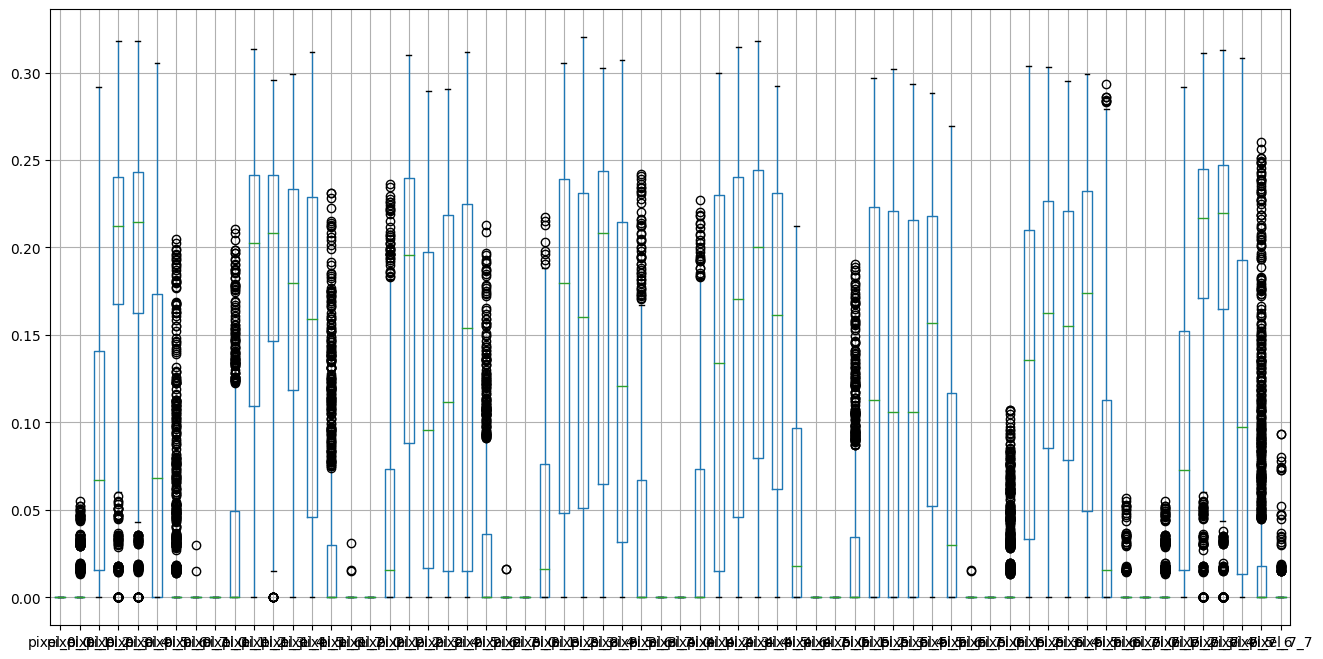

In [ ]:
nueva.boxplot();

Creamos nuestros nuevos conjuntos de datos y de etiquetas:

In [ ]:
nuevo_X = nueva.to_numpy()
nuevo_y = nueva_target.to_numpy()

# Redimensionamos las etiquetas para obtener un vector
nuevo_y_aux = nuevo_y.reshape((nuevo_y.shape[0]))

Volvemos a hacer la representación en 3 dimensiones con TSNE.

In [ ]:
nuevo_tsne_3d = TSNE(n_components=3, random_state=10, perplexity=25.0,init='random',learning_rate='auto')
nuevo_X_3d = nuevo_tsne_3d.fit_transform(nuevo_X)

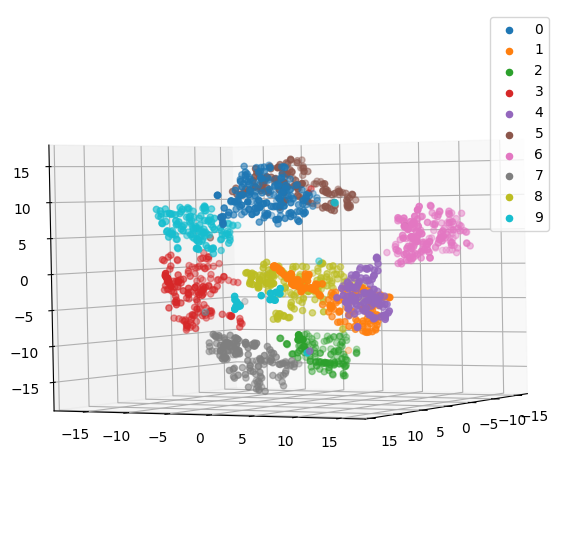

In [ ]:
target_ids = range(len(digits.target_names))

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')



for i, label in zip(target_ids, digits.target_names):
    ax.scatter(nuevo_X_3d[nuevo_y_aux == i, 0],
               nuevo_X_3d[nuevo_y_aux == i, 1],
               nuevo_X_3d[nuevo_y_aux == i, 2],label=label)

ax.azim = 30
ax.roll = 1
ax.elev = 1.5

plt.legend()
plt.show()

Podemos observar que hay menos valores anómalos que en la representación anterior. Sobretodo para el valor de clasificación 1.

Ahora vamos a entrenar nuestro modelo con los datos sin outliers. Para ello, usamos los módulos `train_test_split` y `MLPClassifier` de `scikit-learn`. Suponemos para empezar una red neuronal con 3 capas ocultas con 5 neuronas cada una. Observamos su rendimiento.

In [ ]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
     nuevo_X, nuevo_y_aux, stratify=nuevo_y, random_state=2345)

In [ ]:
mlp = MLPClassifier(solver="lbfgs",max_iter=300,random_state=42,hidden_layer_sizes=(5,5,5,))
mlp.fit(X_train_digits, y_train_digits)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=300, random_state=42,
              solver='lbfgs')

In [ ]:
print("Rendimiento en entenamiento: {:.2f}".format(mlp.score(X_train_digits, y_train_digits)))
print("Rendimiento en el conjunto de prueba: {:.2f}".format(mlp.score(X_test_digits, y_test_digits)))

Rendimiento en entenamiento: 0.80
Rendimiento en el conjunto de prueba: 0.74


Podemos observar también los pesos de la red sin los bias (mlp.coefs_), y los pesos bias de la red (mlp.intercepts_)

In [ ]:
mlp.coefs_

In [ ]:
mlp.intercepts_

Vamos a crear una función que sirva para probar entrenamientos de la red con diferentes funciones de activación y diferente arquitectura.

In [ ]:
def prueba_digits(f_act,capas):
    mlp_prueba = MLPClassifier(solver='lbfgs',
                               random_state=0,
                               hidden_layer_sizes=capas,
                               activation=f_act,
                               max_iter=1000)
    mlp_prueba.fit(X_train_digits, y_train_digits)
    print("Rendimiento en el conjunto de entrenamiento: ",mlp_prueba.score(X_train_digits,y_train_digits))
    print("Rendimiento en el conjunto de prueba: ",mlp_prueba.score(X_test_digits,y_test_digits))
    print("Rendimiento en el conjunto total: ",mlp_prueba.score(X_digits,y_digits))

In [ ]:
prueba_digits('relu',(10,10,10)) # Función de activación ReLu y red con 3 capas ocultas (10 neuronas cada una)

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9148936170212766
Rendimiento en el conjunto total:  0.36505286588759045


In [ ]:
prueba_digits('logistic',(10,10,10)) # Función de activación sigmoide y red con 3 capas ocultas (10 neuronas cada una)

Rendimiento en el conjunto de entrenamiento:  0.11801242236024845
Rendimiento en el conjunto de prueba:  0.11702127659574468
Rendimiento en el conjunto total:  0.09905397885364496


In [ ]:
prueba_digits('relu',(20,20))
mlp1 = MLPClassifier(solver="lbfgs",max_iter=300,random_state=42,hidden_layer_sizes=(20,20),activation='relu')
mlp1.fit(X_train_digits, y_train_digits)

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9574468085106383
Rendimiento en el conjunto total:  0.862548692264886


MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=300, random_state=42,
              solver='lbfgs')

In [ ]:
prueba_digits('logistic',(20,20))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9547872340425532
Rendimiento en el conjunto total:  0.8313856427378965


Podemos observar que, en este caso, el modelo se comporta mejor al añadir más neuronas aunque disminuya el número de capas. Además, la función *ReLu* funciona mejor en este caso que la función *Sigmoide*. Esto puede deberse a que la función sigmoide está acotada entre 0 y 1.

Vamos a tomar el entrenamiento `mlp1`, ya que ha sido con el que mejor rendimiento se ha obtenido, y en el gráfico siguiente se van a representar las intensidades de los pesos de la primera capa oculta de la red (sin bias), es decir, 20 pesos, para cada característica (píxeles).

Un peso de valor absoluto alto significa que ese píxel tendrá mucha influencia en la salida de la neurona correspondiente.


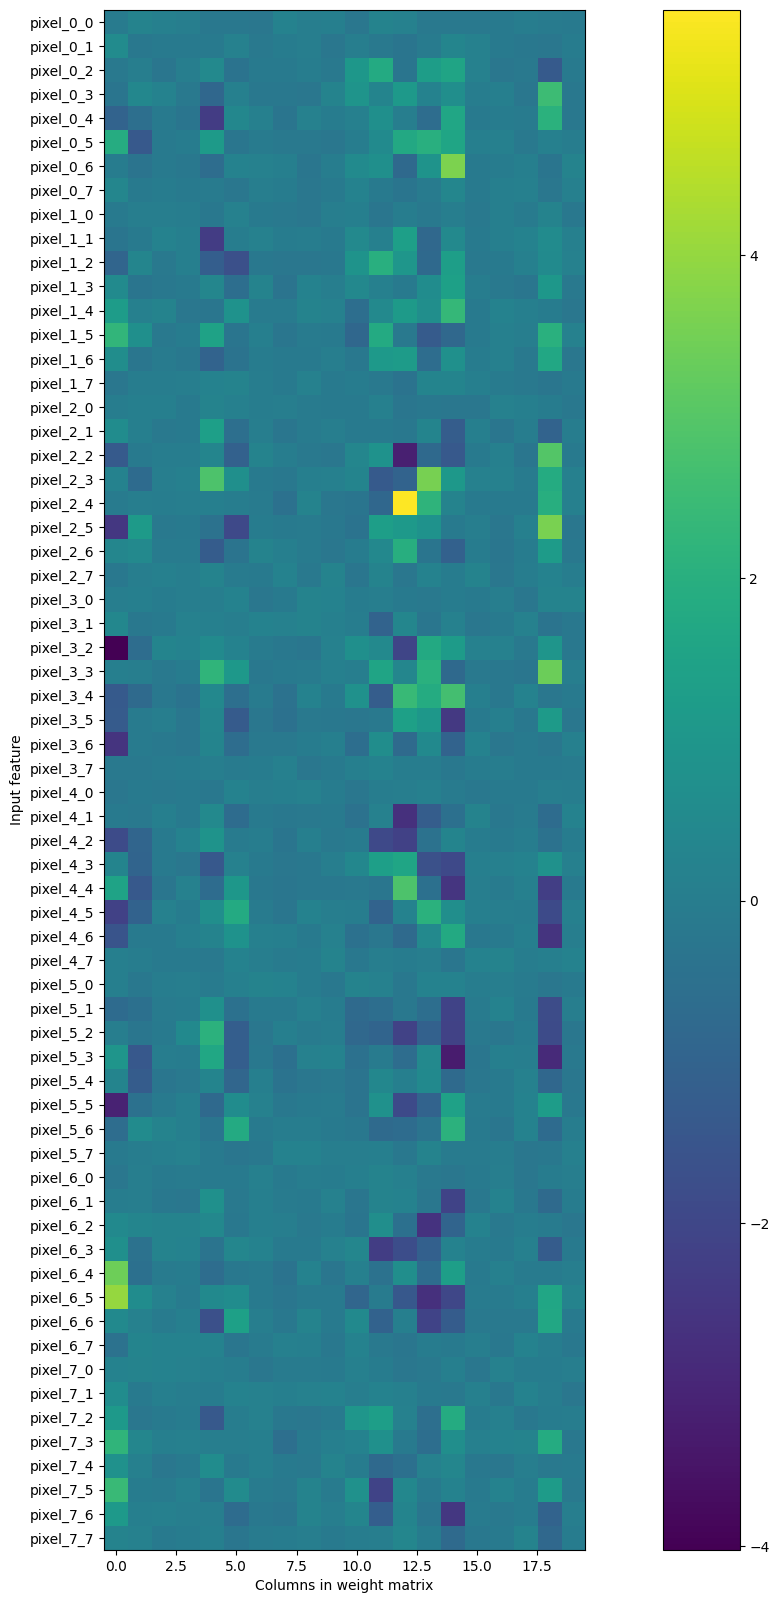

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(mlp1.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(64), digits.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()